> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

With parameters  :
- $D_u = 0.0016, \quad D_v=0.0131$.
- $A = 4.5$.
- $B = 6.96$.

In [2]:
%config Completer.use_jedi = False
import numpy as np
import numba
import sys
sys.path.append("/end/home/rh2310/morpho_repo/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import Brusselator

from matplotlib import pyplot as plt

In [11]:
n = (32, 32)
L = (.05, .05)



D_u = .001
D_v = .020
print(D_u/D_v)
A = 2
B = 3
Ds = np.array([D_u, D_v])


c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0[0, :,:] += A
c0[1, :,:] += B/A
#c0 = data[:, :, :, 0]

f_args = (A, B)
t = np.linspace(0, 128, 8)

dt = 0.01

sol = integrate(c0, t, dt, n, L, Ds, Brusselator, f_args)

0.05


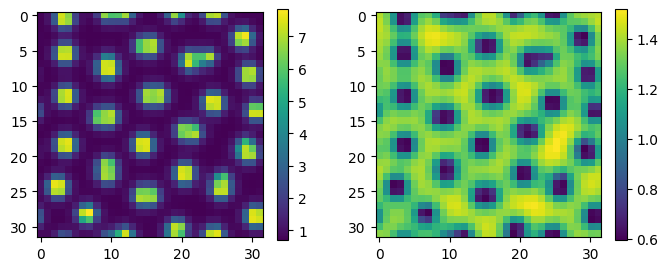

In [12]:
index =-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()